In [1]:
import os, torch, pickle 
from model import GPT, GPTConfig
from magicab import ETokenizer 

device = "mps" if not torch.cuda.is_available() else "cuda"
out_dir = "checkpoint/base"
ckpt_path = os.path.join(out_dir, 'ckpt.pt')
checkpoint = torch.load(ckpt_path, map_location=device)

# Load model 
model = GPT.load_model(checkpoint, device)
model = model.to(device)
model.eval()

# Load tokenizer 
# (1). base tokenizer
meta_path = os.path.join('data', checkpoint['config']['dataset'], 'meta.pkl')
with open(meta_path, 'rb') as f:
    meta = pickle.load(f)
tok = ETokenizer(char_vocab=meta['itos'])
if 'tokenizer_path' in checkpoint: 
    tok = ETokenizer.load(checkpoint["tokenizer_path"])

/var/folders/nn/nbsb8w3570zfgs23h2s0cdzm0000gn/T/ipykernel_38778/2495425314.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_locati

number of parameters: 10.66M


Tokenizer Encoding speed optimisation 

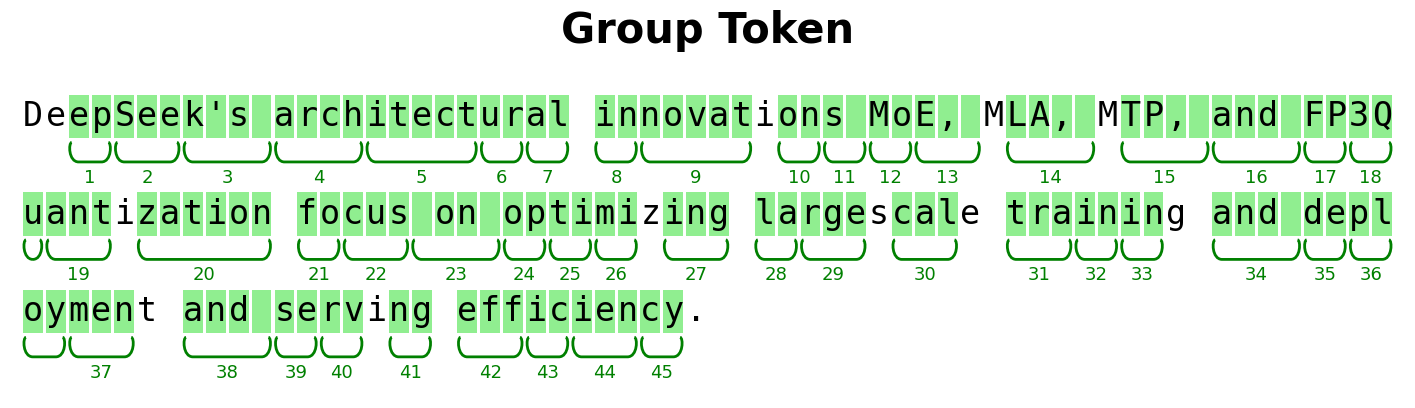

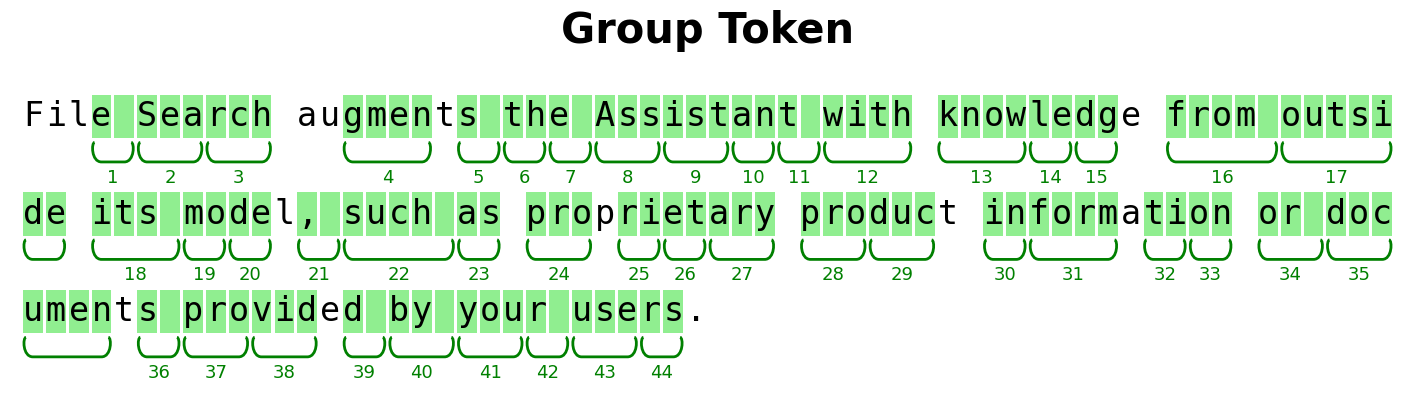

In [3]:
from magicab import Magicab

magicab = Magicab(model, 
                  tokenizer=tok, # input tokenizer
                  checkpoint_dir="checkpoint/base", spike_perplexity_threshold=5.0, group_perplexity_threshold=10.5)

magicab.group_quantile_threshold = 1.0

txt1 = "DeepSeek's architectural innovations MoE, MLA, MTP, and FP3Quantization focus on optimizing largescale training and deployment and serving efficiency."
txt2 = "File Search augments the Assistant with knowledge from outside its model, such as proprietary product information or documents provided by your users."
texts = [txt1, txt2]

# (a). Batch Visualizer
char_perplexity = magicab.visualize_changes(texts) # issue: likely empty remove token groups leading to issue in map_to_char functional

In [4]:
magicab.cache_vocab_change(text=texts)
magicab.update_vocab(max_size_change=1000)

 - Group token detection took: 0.0006 seconds
   :: add_tokens: 0.0003 seconds
   :: add_tokens: per input row  0.0002 seconds
   :: slice_embeddings: 0.0031 seconds
   :: slice_embeddings: per input row  0.0015 seconds
   :: update_token_addition: 0.0000 seconds
   :: update_token_addition: per input row  0.0000 seconds
   :: update_caches: 0.0003 seconds
   :: update_caches: per input row  0.0001 seconds
 - Vocabulary addition prep took: 0.0037 seconds
 - Cache updates took: 0.0000 seconds
Function _cache_vocabulary_change took 0.0470 seconds
:: Total 76 token groups, added 143 pairwise merges
:: Total 143 new embeddings to be added into model
:: Updated model vocab size:  235
Function add_to_vocab took 0.0153 seconds
 - add_to_vocab done


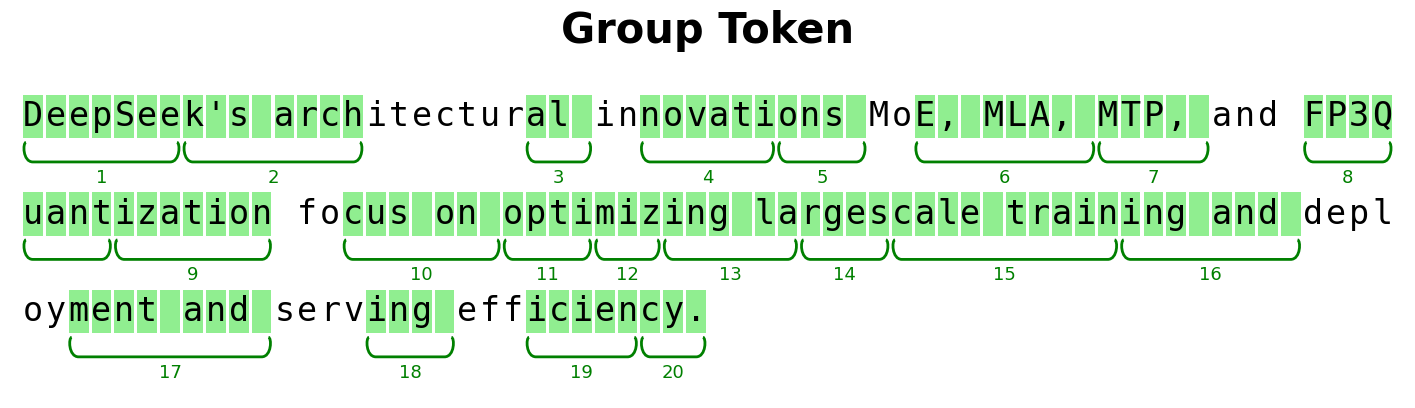

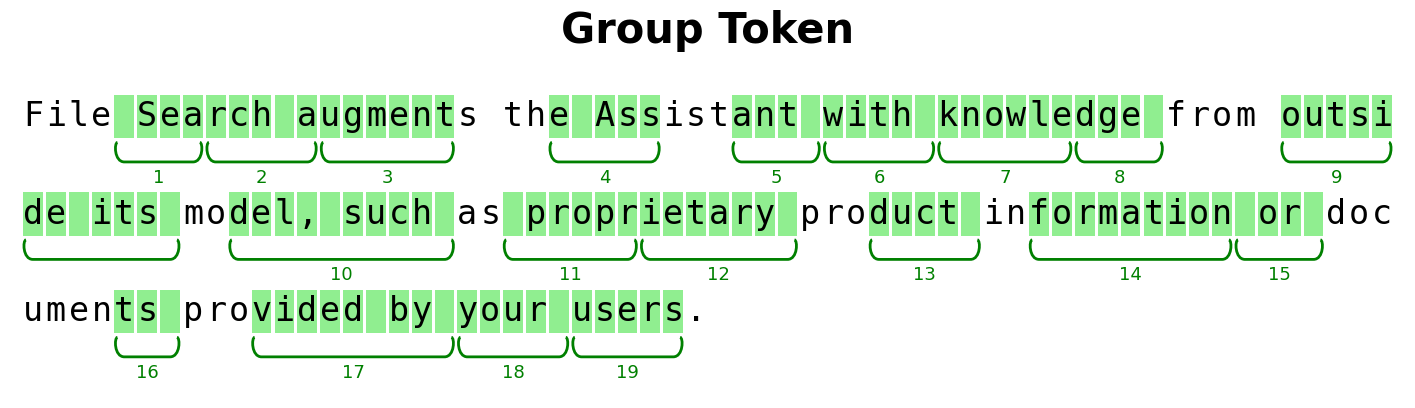

In [5]:
char_perplexity = magicab.visualize_changes(texts) # issue: likely empty remove token groups leading to issue in map_to_char functional